In [1]:
import pandas as pd
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)

In [2]:
abalone.head()

0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7

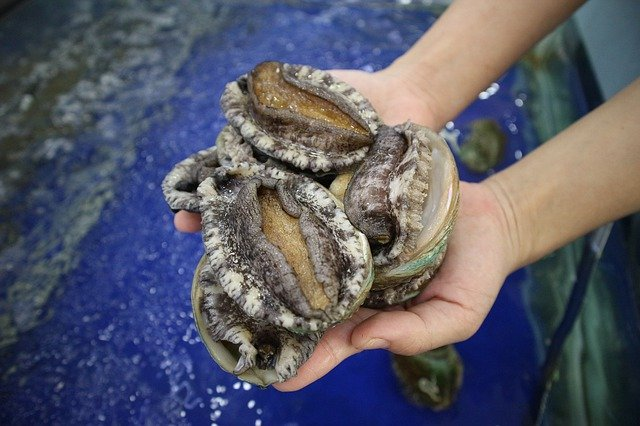

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years


https://archive.ics.uci.edu/ml/datasets/abalone

In [3]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

In [4]:
abalone = abalone.drop("Sex", axis=1)

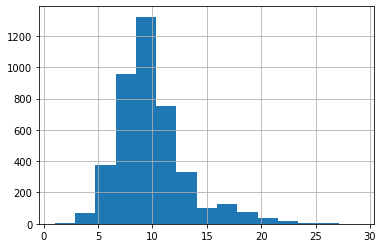

In [6]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

In [7]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [8]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [10]:
import numpy as np
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208,
])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 1  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7  1  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7 16  7  7  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10 15 15 13  6  2  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  2 27 26 32 10  6  5  3  1  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  8 22 36 30 16 13  4  3  3  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8 29 41 36 19  8  3  3  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  3 10 19 26 27 21 10  9  2  3  4  1  2  1  0  0  0  1  0  0  0]
 [ 0  0  0  1  6 15 26 18 17 10 10  8  4  1  0  4  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  7 14 12 25 10  7  8  2  1  0  1  1  1  1  0  1  0  0  0]
 [ 0  0  0  0  1  6  3  6 12  3  3  3  4  4  2  0  2  0  2  0  0  0  0  0]
 [ 0  0  0  1  1  2  2  7  6  1  0  5  1  1  0  2  0  1  1  0  0  1  0  0]
 [ 0  0  0  0  0  1  4  0  1  5  2  2  4  0  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  3

In [29]:
new=sc_X.transform([new_data_point])
p=classifier.predict(new)

In [30]:
print(p)

[8]


In [31]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, y_pred)
print("Başarım:",a)

Başarım: 0.2


In [34]:
classifier.tree_?

In [35]:
classifier.tree_.impurity

array([3.58418911, 2.995675  , 2.298724  , ..., 1.        , 0.        ,
       0.        ])